## Making a Request to the ESPN Fantasy API

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
swid = '{FEDFD550-8D47-4C16-A6AC-028D402FA873}'
espn_s2 = 'AEAYvjo76e3PfNkb0gHcEuispXq4I0eV3cx7PPprc38ct28AkZf3i0%2FwWGZWyjMxXgk7mYizgN9oqeerqvjtT6pl6qEpp5GJQjNIBOXd%2F4q186B406uxTesz10Xk56u9BGRzZIH1N48f2QmKSU49Fg8k%2BAI9A8WLUok9CLILSPuh5LRjjqoa7MbSOUZNs9xqlWFXuRsy0zo51fy44sY92Ri91Ey7YStwDfPoRbNuoP0KvXUkcCymfIvboGGlMr3QfY2WLpNFBuBIgI6j2tvCKZehS7e2sdkiVQonjLKtqWTqqw%3D%3D'

In [5]:
league_id = '656635509'
season = '2023'
week = 1

In [6]:
url = 'https://lm-api-reads.fantasy.espn.com/apis/v3/games/ffl/seasons/{}/segments/0/leagues/{}?view=mMatchup&view=mMatchupScore'.format(season, league_id)

In [7]:
r = requests.get(url,
                     params={'scoreingPeriodId':week},
                     cookies={"SWID": swid, "espn_s2": espn_s2})
espn_raw_data = r.json()

## Saving the JSON Response to a Pandas Dataframe

### Accessing Nested JSON Data 

In [8]:
columns = [
        'Team',
        'Player',
        'Slot',
        'Projected',
        'Actual']

In [9]:
 # get a single team
team = espn_raw_data['teams'][0]
team_id = team['id']

In [10]:
team_abbrev = {
    1: 'BRAD',
    2: 'SAi',
    3: 'DAP',
    4: 'DAM',
    5: 'KUBs',
    6: 'JSOs',
    7: 'TST',
    8: 'DOOM',
}

In [11]:
team_owner = team_abbrev[team_id]
print(team_owner)

BRAD


In [17]:
#loop over every player on the teams roster
for player in team['roster']['entries']:
    print(player['playerPoolEntry']['player']['fullName'])
    print(player['lineupSlotId'])

Justin Jefferson
4
CeeDee Lamb
4
Travis Etienne Jr.
2
DeAndre Hopkins
23
James Cook
2
Drake London
20
Brian Robinson Jr.
20
Isiah Pacheco
20
Jordan Addison
20
Brock Purdy
0
Sam Howell
20
Kenneth Walker III
20
Brandon Aubrey
17
Jake Ferguson
6
Ezekiel Elliott
20
Bills D/ST
16


In [12]:
eligible_positions = {
    0 : 'QB', 
    2 : 'RB', 
    4 : 'WR',
    6 : 'TE', 
    7 : 'OP',
    16: 'D/ST', 
    17: 'K',
    20: 'Bench',
    21: 'IR',
    23: 'Flex'
}

In [13]:
for player in team['roster']['entries']:
    print(player['playerPoolEntry']['player']['fullName'])
    print(player['lineupSlotId'])
    lineup_slot = player['lineupSlotId']
    print(eligible_positions[lineup_slot])

Justin Jefferson
4
WR
CeeDee Lamb
4
WR
Travis Etienne Jr.
2
RB
DeAndre Hopkins
23
Flex
James Cook
2
RB
Drake London
20
Bench
Brian Robinson Jr.
20
Bench
Isiah Pacheco
20
Bench
Jordan Addison
20
Bench
Brock Purdy
0
QB
Sam Howell
20
Bench
Kenneth Walker III
20
Bench
Brandon Aubrey
17
K
Jake Ferguson
6
TE
Ezekiel Elliott
20
Bench
Bills D/ST
16
D/ST


### Projected and Actual Points

In [14]:
# calculate for a single player
team = espn_raw_data['teams'][0]
player = team['roster']['entries'][0]
player_name = player['playerPoolEntry']['player']['fullName']

In [15]:
for stats in player['playerPoolEntry']['player']['stats']:
    #skip rows where the scoring period does not match with current week
    if stats['scoringPeriodId'] != week:
        continue
    # if the souce id = 0, these are actual stats
    if stats['statSourceId'] == 0:
        actual = stats['appliedTotal']
    # if the source id = 1, these are projected stats
    elif stats['statSourceId'] == 1:
        projected = stats['appliedTotal']

In [16]:
team = espn_raw_data['teams'][0]
for player in team['roster']['entries']:
    player_name = player['playerPoolEntry']['player']['fullName']
    # get the projected and actual points
    projected = None, 
    actual = None
    
    # loop over the stats for each player
    for stats in player['playerPoolEntry']['player']['stats']:
        # skip the rows where the scoring period does not match up with the curren week
        if stats['scoringPeriodId'] != week:
            continue
        # if the source id = 0 then these are actual stats
        if stats['statSourceId'] == 0:
            actual = stats['appliedTotal']
        # if the source id = 1 then these are projected stats
        elif stats['statSourceId'] == 1:
            projected = stats['appliedTotal']

In [18]:
# create an empty list to append data to
projection_data = []

for week in range(1, 18):
    print('Week', week)
    
    # get the raw data
    r = requests.get(url,
                    params={'scoringPeriodId': week},
                    cookies={"SWID": swid, "espn_s2": espn_s2})
    espn_raw_data = r.json()
    
    # loop over each team in the request
    for team in espn_raw_data['teams']:
        # get the team_id to map to team names
        team_id = team['id']
        # create a new column with the team_abbrev using the team_id as the key
        team_owner = team_abbrev[team_id]
        # loop over every player on the teams roster
        for player in team['roster']['entries']:
            player_name = player['playerPoolEntry']['player']['fullName']
            lineup_slot = player['lineupSlotId']
            # create a new column with the position using the lineup slot as the key
            position = eligible_positions[lineup_slot]
            
            # get the projected and actual points
            projected = None,
            actual = None
            
            # loop over the stats for each player
            for stats in player['playerPoolEntry']['player']['stats']:
                # skip rows with mismatched scoring period
                if stats['scoringPeriodId'] != week:
                    continue
                # if the source id = 0, these are actual stats
                if stats['statSourceId'] == 0:
                    actual = stats['appliedTotal']
                # if the source id = 1, these are the projected stats
                elif stats['statSourceId'] == 1:
                    projected = stats['appliedTotal']
            
            # append all the data to the empty list
            projection_data.append([
                week,
                team_owner,
                player_name,
                lineup_slot,
                position,
                projected,
                actual
            ])
print('Done getting projected & actual stats.')

Week 1
Week 2
Week 3
Week 4
Week 5
Week 6
Week 7
Week 8
Week 9
Week 10
Week 11
Week 12
Week 13
Week 14
Week 15
Week 16
Week 17
Done getting projected & actual stats.


In [19]:
# convert the list to a dataframe
df = pd.DataFrame(projection_data,
                  columns = ['Week',
                            'Team',
                            'Player',
                            'Lineup Slot',
                            'Position',
                            'Projected',
                            'Actual'])

# sample ten random rows of data
df.sample(10)

,Week,Team,Player,Lineup Slot,Position,Projected,Actual
1026,8,DOOM,Tee Higgins,20,Bench,10.656479,9.40
364,3,TST,Deshaun Watson,20,Bench,17.384111,21.16
808,7,SAi,Anders Carlson,17,K,8.29391,4.00
974,8,DAM,Luke Musgrave,20,Bench,6.672755,1.90
48,1,DAM,Bijan Robinson,2,RB,0.0,17.30
1276,10,TST,Justin Herbert,0,QB,18.872313,28.42
1838,15,BRAD,Jake Ferguson,6,TE,9.502621,7.40
1806,14,TST,Michael Thomas,20,Bench,0.0,0.00
2013,16,DAM,Alvin Kamara,2,RB,14.762797,6.00
822,7,DAP,Jerick McKinnon,20,Bench,5.229207,3.60


## Plotting Actual and Projected Data

In [20]:
# filter out bench players for projection purposes
starters_df = df[~df['Position'].isin(['Bench'])]

In [21]:
# fill any NA values to reduce errors when grouping
starters_df = starters_df.fillna(0)
# check a sample to be sure of bench removal
starters_df.sample(5)

,Week,Team,Player,Lineup Slot,Position,Projected,Actual
2008,16,DAM,Lamar Jackson,0,QB,21.237774,22.58
1628,13,DAM,Zack Moss,23,Flex,15.418625,6.70
1270,10,TST,Ja'Marr Chase,4,WR,17.45338,20.90
322,3,KUBs,Austin Ekeler,2,RB,0.0,0.00
340,3,JSOs,Jahmyr Gibbs,2,RB,13.858739,8.70


In [22]:
# test on one team
# filter downa and select only one team's starters
team_starters_df = starters_df[starters_df['Team'] == 'DOOM']

In [23]:
# select the Week and value columns from the groupby object
plot_data = team_starters_df[['Week','Projected','Actual']].groupby(['Week']).sum().reset_index()

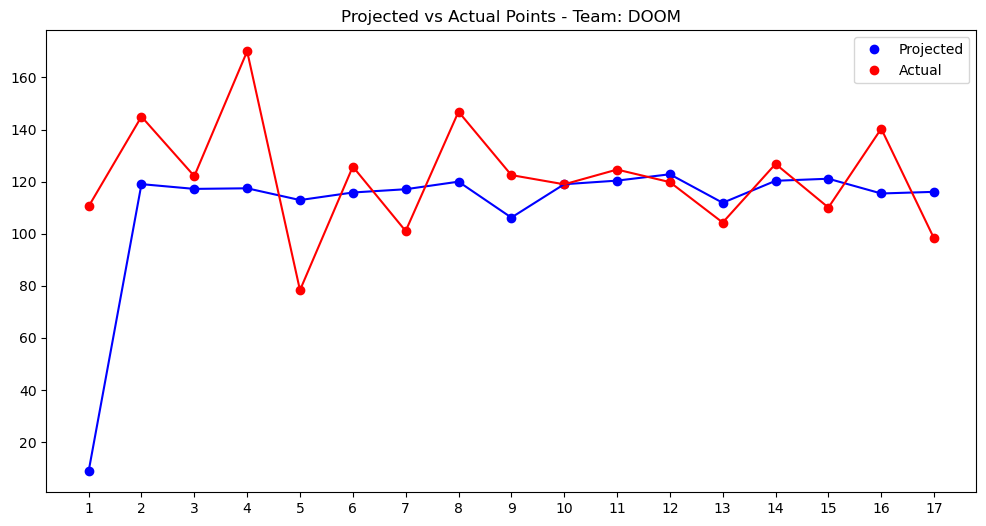

In [24]:
# create the plot
plt.figure(figsize=(12, 6))
plt.plot(plot_data['Week'], plot_data['Projected'], 'bo', label='Projected')
plt.plot(plot_data['Week'], plot_data['Actual'], 'ro', label='Actual')
plt.plot(plot_data['Week'], plot_data['Projected'], 'b-')
plt.plot(plot_data['Week'], plot_data['Actual'], 'r-')
# add a legend and display plot
plt.title('Projected vs Actual Points - Team: DOOM')
plt.legend()
plt.xticks(plot_data['Week'])
plt.show()

### Create a function to create a graph for each team

In [25]:
# create a function to do it for each team
# this will only work with bench players filtered out
def plot_team(df, team_abbrev):
  # filter down and select only the one teams starters 
  df2 = df[df['Team'] == team_abbrev]
 
  # Select the Week and value columns from the groupby object
  plot_data = df2[['Week','Projected','Actual']].groupby(['Week']).sum().reset_index()
  # Set the figure size and create the plot
  plt.figure(figsize=(12, 6))
  plt.plot(plot_data['Week'], plot_data['Projected'], 'bo', label='Projected')
  plt.plot(plot_data['Week'], plot_data['Actual'], 'ro', label='Actual')
  plt.plot(plot_data['Week'], plot_data['Projected'], 'b-')
  plt.plot(plot_data['Week'], plot_data['Actual'], 'r-')
  # Add a legend and show the plot
  plt.title(team_abbrev +' Projected vs. Actual Points')
  plt.legend()
  plt.xticks(plot_data['Week'])
  plt.show()

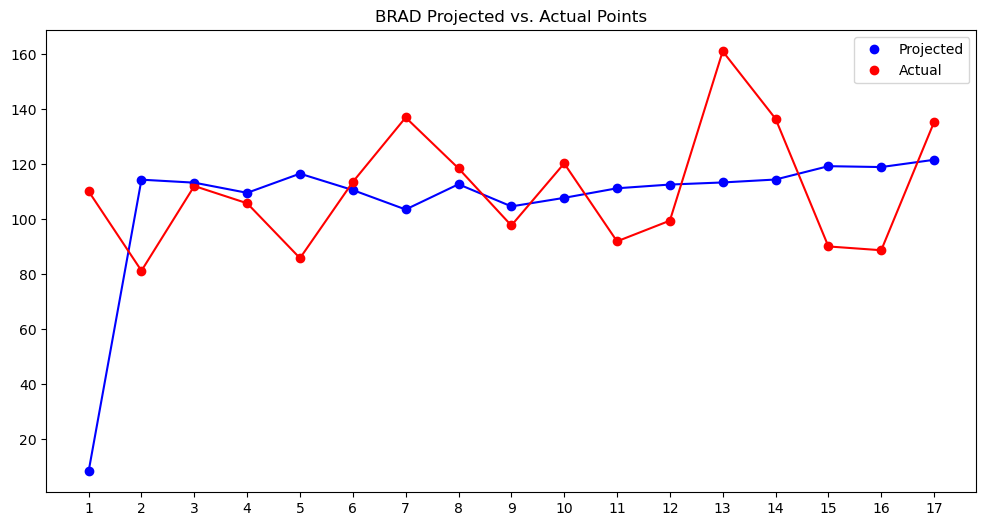

In [26]:
# testing for other team
plot_team(starters_df, 'BRAD')

## Quantify the Difference in Projections & Actual Scores

In [27]:
# create a function to get the difference of projected scores and actual scores
def calc_difference(df):
  return df['Projected'].sum() - df['Actual'].sum()

In [30]:
frank_player_df = starters_df[starters_df["Team"] == 'DOOM'].groupby(['Player']).apply(calc_difference)

In [31]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(round(frank_player_df.sort_values()),2)

Player
Cowboys D/ST          -61.0
Christian McCaffrey   -47.0
Keenan Allen          -44.0
Evan Engram           -28.0
Chiefs D/ST           -23.0
Justin Tucker         -16.0
A.J. Brown            -14.0
Derek Carr            -12.0
Cole Kmet              -7.0
Brandon Aiyuk           0.0
Derrick Henry           0.0
Zamir White             0.0
Jordan Love             0.0
Chuba Hubbard           2.0
Alexander Mattison      2.0
Jake Moody              2.0
Tee Higgins             6.0
Terry McLaurin          8.0
Dalton Schultz         10.0
Joe Burrow             10.0
Tua Tagovailoa         27.0
dtype: float64 2
